<a href="https://colab.research.google.com/github/rosembergennes/python/blob/master/DAYTRADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregando as BIBLIOTECAS 

In [ ]:
!apt update
!apt install chromium-chromedriver
!pip install selenium
!pip install dnspython

import time
from datetime import datetime, timedelta
from selenium import webdriver
import requests
import pandas as pd
from google.colab import files
import os
import numpy as np
from pandas import DataFrame
import pandas as pd
from datetime import timedelta, date ,datetime
from decimal import Decimal
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime
from pymongo import MongoClient
import pprint
import datetime
import json
# Importando numpy
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date ,datetime
pd.options.display.max_columns = None
pd.options.display.max_rows = None


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 htt

## OBTENDO DADOS DO ATLAS MONGODB

In [ ]:
# obtendo dados do atlas mongodb
client = MongoClient("mongodb+srv:")
db = client.acoes
collection = db.TCCBIGDATA
data = pd.DataFrame(list(collection.find()))


In [ ]:
# limpeza dos dados em Branco 
data = data.dropna(subset=['SETOR'])
data = data.loc[(data['SETOR'] != "")]

In [ ]:
data.head()

,_id,DATPRG,CODBDI,CODNEG,NOMRES,ESPECI,PREABE,PREMAX,PREMIN,PREULT,PREOFC,PREOFV,VOLTOT,VALAF,VALMM,PERCAF,PERCMM,EMPRESA,SETOR,SUBSETOR,VALMERC,VALFIRMA,NUACOES,PL,CRESULT5,VPA,GIROATIVO
0,5f2be5e43427840390ba032a,2020-08-05,2,AALR3,ALLIAR,ON NM,11.07,11.12,10.69,10.72,10.72,10.73,8011134.0,-0.35,0.43,-3.16,3.87,ALLIAR ON NM,Saúde,"Serviços Médico - Hospitalares, Análises e Dia...",1.268100e+09,1.835620e+09,118293000.0,130.28,0.9,10.68,0.40
1,5f2be5e43427840390ba0336,2020-08-05,2,ALUP11,ALUPAR,UNT N2,24.10,24.23,23.94,24.19,24.19,24.20,25051431.0,0.09,0.29,0.37,1.20,ALUPAR UNT N2,Energia Elétrica,Energia Elétrica,7.088560e+09,1.230160e+10,879111000.0,10.60,32.5,17.77,0.23
2,5f2be5e43427840390ba0332,2020-08-05,2,ALPK3,ESTAPAR,ON NM,9.65,9.65,9.40,9.42,9.41,9.56,475608.0,-0.23,0.25,-2.38,2.59,ESTAPAR ON NM,Serviços,Serviços Diversos,1.825320e+09,3.322910e+09,193771000.0,0.00,0.0,2.82,0.00
3,5f2be5e43427840390ba033f,2020-08-05,2,AZEV4,AZEVEDO,PN,4.05,4.30,4.00,4.20,4.20,4.25,66449.0,0.15,0.30,3.70,6.98,AZEVEDO & TRAVASSOS PN,Construção e Engenharia,Construção Pesada,2.268000e+07,5.668700e+07,5400000.0,0.30,-49.4,-46.10,-0.82
4,5f2be5e43427840390ba0349,2020-08-05,2,BBRK3,BR BROKERS,ON NM,2.25,2.30,2.17,2.30,2.30,2.31,1168166.0,0.05,0.13,2.22,5.65,BR Brokers ON NM,Construção e Engenharia,Intermediação Imobiliária,8.344010e+07,3.510010e+07,36278300.0,-0.55,2.2,4.59,0.38


## ANALISANDO MELHORES EMPRESAS PARA DAYTRADE 

In [ ]:
# OBSERVAÇÃO METODO ESCOLHIDO.
#
# Após analisar resultados e compara-los com os graficos, observou-se que a utilização da MEDIANA
# representa a melhor tomada de decisão.   
#
# 1.) O Periodo diferente do daytrade será filtrado, pelo periodo de uma semana.
#
# 2.) Agrupados dados para analise.
#
# 3.) Listando as ações em ordem crescente da variação maxima e minima.
#
# 4.) Analisando por oportunidade de ganho diario.
#

In [ ]:
# 1.)
filtro_data = (data['DATPRG'] >= '2020-09-07') & (data['DATPRG'] <= '2020-09-14')
df_filtrado_data = data[filtro_data]
df_filtrado_data.head()

,_id,DATPRG,CODBDI,CODNEG,NOMRES,ESPECI,PREABE,PREMAX,PREMIN,PREULT,PREOFC,PREOFV,VOLTOT,VALAF,VALMM,PERCAF,PERCMM,EMPRESA,SETOR,SUBSETOR,VALMERC,VALFIRMA,NUACOES,PL,CRESULT5,VPA,GIROATIVO
7717,5f5827d7f7fd734eb67c6f97,2020-09-08,2,AALR3,ALLIAR,ON NM,12.59,12.87,12.31,12.57,12.57,12.59,7388332.0,-0.02,0.56,-0.16,4.35,ALLIAR ON NM,Saúde,"Serviços Médico - Hospitalares, Análises e Dia...",1.486940e+09,2.063360e+09,1.182930e+08,-17.60,-4.0,9.97,0.35
7718,5f5827d7f7fd734eb67c6f98,2020-09-08,2,ABCB4,ABC BRASIL,PN N2,13.90,13.90,13.62,13.75,13.75,13.84,5775733.0,-0.15,0.28,-1.08,2.01,ABC Brasil PN N2,Financeiros,Bancos,3.002440e+09,0.000000e+00,2.183590e+08,7.17,2.8,18.75,0.00
7719,5f5827d7f7fd734eb67c6f99,2020-09-08,2,ABEV3,AMBEV S/A,ON,12.55,12.55,12.32,12.35,12.35,12.36,256809604.0,-0.20,0.23,-1.59,1.83,AMBEV S/A ON NM,Bebidas,Cervejas e Refrigerantes,1.943290e+11,1.836280e+11,1.573510e+10,21.80,3.0,4.70,0.43
7720,5f5827d7f7fd734eb67c6f9a,2020-09-08,2,ADHM3,ADVANCED-DH,ON,2.12,2.15,2.11,2.12,2.12,2.14,9315.0,0.00,0.04,0.00,1.86,ADVANCED-DH ON,Prods. de Uso Pessoal e de Limpeza,Produtos de Uso Pessoal,3.457300e+07,3.457300e+07,1.630800e+07,-5.55,43.5,-1.21,0.14
7721,5f5827d7f7fd734eb67c6f9b,2020-09-08,2,AFLT3,AFLUENTE T,ON,10.71,10.71,10.20,10.21,10.20,10.60,5231.0,-0.50,0.51,-4.67,4.76,AFLUENTE T ON,Energia Elétrica,Energia Elétrica,6.440980e+08,5.809390e+08,6.308500e+07,27.11,10.7,3.57,0.16


In [ ]:
# 2.)
df_pn=df_filtrado_data.groupby(['CODNEG','NOMRES','SETOR','ESPECI'])[['VALMM','PERCMM','PREABE','PREMAX','PREMIN','PREULT','VOLTOT']].median().reset_index()
df_empresas_saudaves=df_pn
df_empresas_saudaves.head()

,CODNEG,NOMRES,SETOR,ESPECI,VALMM,PERCMM,PREABE,PREMAX,PREMIN,PREULT,VOLTOT
0,AALR3,ALLIAR,Saúde,ON NM,0.61,5.17,12.00,12.18,11.64,11.80,7617886.0
1,ABCB4,ABC BRASIL,Financeiros,PN N2,0.45,3.30,13.53,13.63,13.18,13.32,7636578.0
2,ABEV3,AMBEV S/A,Bebidas,ON,0.34,2.75,12.37,12.55,12.17,12.35,302449607.0
3,ADHM3,ADVANCED-DH,Prods. de Uso Pessoal e de Limpeza,ON,0.04,1.91,2.12,2.15,2.10,2.12,15729.0
4,AFLT3,AFLUENTE T,Energia Elétrica,ON,0.38,3.66,10.20,10.50,10.01,10.10,7000.0


In [ ]:
# 3.) 

df_pos_cres = df_empresas_saudaves.reset_index(drop=True) 
df_pos_cres= df_pos_cres.sort_values("VALMM",ascending=False)
df_pos_cres_ordenado_top10=df_pos_cres.head(10).reset_index(drop=True)
df_pos_cres_ordenado_top10['NOMRES_CODNEG']=df_pos_cres_ordenado_top10.apply(lambda x:'%s (%s %s)' % (x['NOMRES'],x['CODNEG'],x['SETOR']),axis=1)
df_pos_cres_ordenado_top10["VALMM"]=round(df_pos_cres_ordenado_top10["VALMM"],2)
df_pos_cres_ordenado_top10["PERCMM"]=round(df_pos_cres_ordenado_top10["PERCMM"],2)
df_pos_cres_ordenado_top10["VOLTOT"]=round(df_pos_cres_ordenado_top10["VOLTOT"],2)
df_pos_cres_ordenado_top10.head(10)

,CODNEG,NOMRES,SETOR,ESPECI,VALMM,PERCMM,PREABE,PREMAX,PREMIN,PREULT,VOLTOT,NOMRES_CODNEG
0,COCE3,COELCE,Energia Elétrica,ON,6.89,9.26,72.285,74.390,67.50,70.000,71220.5,COELCE (COCE3 Energia Elétrica)
1,GPCP3,GPC PART,Químicos,ON,5.79,7.72,76.550,78.500,73.00,73.000,7030065.0,GPC PART (GPCP3 Químicos)
2,MWET3,WETZEL S/A,Material de Transporte,ON,4.62,7.10,64.850,65.125,60.50,60.500,204449.0,WETZEL S/A (MWET3 Material de Transporte)
3,CEED3,CEEE-D,Energia Elétrica,ON N1,4.60,7.17,62.050,63.300,59.30,60.350,83984.5,CEEE-D (CEED3 Energia Elétrica)
4,BAHI3,BAHEMA,Holdings Diversificadas,ON MA,4.25,3.36,120.750,123.495,119.50,122.000,187117.5,BAHEMA (BAHI3 Holdings Diversificadas)
5,CEEB5,COELBA,Energia Elétrica,PNA,4.10,9.69,40.000,42.300,38.20,39.810,76193.0,COELBA (CEEB5 Energia Elétrica)
6,ESTR4,ESTRELA,Viagens e Lazer,PN,4.00,12.12,32.870,33.000,30.02,30.500,718586.0,ESTRELA (ESTR4 Viagens e Lazer)
7,CEBR3,CEB,Energia Elétrica,ON,3.99,5.87,65.750,67.000,62.08,63.000,323271.0,CEB (CEBR3 Energia Elétrica)
8,GNDI3,INTERMEDICA,Saúde,ON NM,3.70,4.89,72.900,75.550,71.65,73.000,229253497.0,INTERMEDICA (GNDI3 Saúde)
9,BNBR3,NORD BRASIL,Financeiros,ON,3.65,4.40,82.860,82.860,78.75,79.305,48307.5,NORD BRASIL (BNBR3 Financeiros)


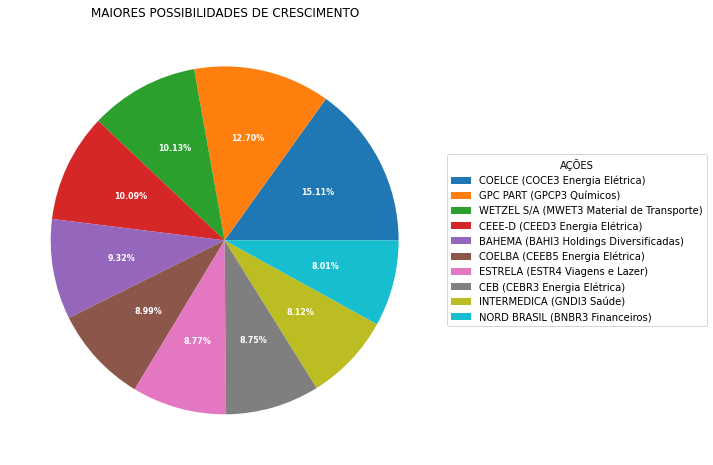

In [ ]:
# 4.)

# Area de plotagem do Grafico definindo o tamanho figsize=(8,8)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

# Matriz dos dados (valores,titulos)
valores =  df_pos_cres_ordenado_top10["VALMM"].head(10)
titulos =  df_pos_cres_ordenado_top10["NOMRES_CODNEG"].head(10)

# Calculo para porcentagem dentro do grafico
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%".format(pct, absolute)

# Criando o grafico e acertando as legendas
wedges, texts, autotexts = ax.pie(valores, autopct=lambda pct: func(pct, valores),
                                  textprops=dict(color="w"))

ax.legend(wedges, titulos,
          title="AÇÕES",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("MAIORES POSSIBILIDADES DE CRESCIMENTO")

plt.show()